# Validation and Verification of the 25mm collimator simulation, GP3

Here we provide code and output which verifies and validates the 25mm collimator simulation. We're using simulation phase space file output and input to check the validity of the result. This is 25 sources machine, so length of the source is increased to 18mm, source is moved forward by 3mm and activity should be 180Ci.

In [1]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import BEAMphsf

import text_loader
import H1Dn
import H1Du
import ListTable

%matplotlib inline

*First, set filename to what we want to examine and read PhSF header*

In [2]:
C = 25
phsfname = "PHSF" + "." + str(C)
phsfname = "../" + phsfname
print ("We're reading the {1}mm phase space file = {0}".format(phsfname, C))

We're reading the 25mm phase space file = ../PHSF.25


*Checking PhSF header parameters*

In [3]:
events, nof_photons, nof_electrons, nof_positrons = text_loader.load_events(phsfname, -1)

print("Number of loaded events: {0}".format(len(events)))
print("Number of loaded photons: {0}".format(nof_photons))
print("Number of loaded electrons: {0}".format(nof_electrons))
print("Number of loaded positrons: {0}".format(nof_positrons))
print("Yield: {0}".format(nof_photons/40000000000.0))

Number of loaded events: 10687272
Number of loaded photons: 10687272
Number of loaded electrons: 48860
Number of loaded positrons: 25
Yield: 0.0002671818


## Energy Spectrum tests

*We expect energy spectrum to be scattering background together with peaks δ(E-1.17) and δ(E-1.33). Below we'trying to prove this statement. We will draw the distributions and histograms to estimate influence of the background scattering and get the data about δ-peaks*

### We're filling energy histogram now, basic checks

*We're building scale with 5 bins in the region between 1.17 and 1.33 MeV, all other bins below 1.17 are of about the same size as those 5*

In [4]:
# make scale with explicit bins at 1.17 MeV and 1.33 MeV
nbins = 5

scale = BEAMphsf.make_energy_scale(nbins, lo = 0.01, me = 1.1700001, hi = 1.3300001)

he = H1Dn.H1Dn(scale)

for e in events:
    WT = e[0]
    E  = e[1]
    he.fill(E, WT)
    
print("Number of events in histogram: {0}".format(he.nof_events()))
print("Integral in histogram: {0}".format(he.integral()))
print("Underflow bin: {0}".format(he.underflow()))
print("Overflow  bin: {0}".format(he.overflow()))

Number of events in histogram: 10687272
Integral in histogram: 10687272.0
Underflow bin: (246.0, 246, 246.0)
Overflow  bin: (0.0, 0, 0.0)


*Underflow bin is empty, as well as Overflow bin. This is good because we do not expect events beyond 1.33MeV and below ECUT*

### Drawing Probability Density Function for 5 bins between 1.33 peak and 1.17 peak.

PDF normalization: 0.9999999999999998


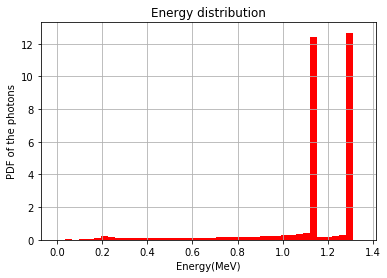

In [5]:
X = []
Y = []
W = []

scale = he.x()
n     = len(scale)
norm  = 1.0/he.integral()

sum = 0.0

for k in range (-1, he.size()+1):
    x = 0.0
    w = (he.lo() - x)
    if k == he.size():
        w = (scale[-1]-scale[-2])
        x = he.hi()
    elif k >= 0:
        w = (scale[k+1] - scale[k])
        x = scale[k]

    d = he[k]     # data from bin with index k
    y = d[0] / w  # first part of bin is collected weights
    y = y * norm
    X.append(x)
    Y.append(y)
    W.append(w)
    sum += y*w

print("PDF normalization: {0}".format(sum))

E133_5 = Y[-2]
E117_5 = Y[-2-nbins]

p1 = plt.bar(X, Y, W, color='r')

plt.xlabel('Energy(MeV)')
plt.ylabel('PDF of the photons')
plt.title('Energy distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

In [6]:
# saving peak values
print("Peak PDF value at 1.33 MeV: {0}".format(E133_5))
print("Peak PDF value at 1.17 MeV: {0}".format(E117_5))

Peak PDF value at 1.33 MeV: 12.67619732612774
Peak PDF value at 1.17 MeV: 12.407574636446034


### Filling energy histogram with double number of bins

*We're building scale with 10 bins in the region between 1.17 and 1.33 MeV, all other bins below 1.17 are of about the same size as those 10*

In [7]:
# make scale with explicit bins at 1.17 MeV and 1.33 MeV
nbins = 10

scale = BEAMphsf.make_energy_scale(nbins, lo = 0.01, me = 1.1700001, hi = 1.3300001)

he = H1Dn.H1Dn(scale)

for e in events:
    WT = e[0]
    E  = e[1]
    he.fill(E, WT)
    
print("Number of events in histogram: {0}".format(he.nof_events()))
print("Integral in histogram: {0}".format(he.integral()))
print("Underflow bin: {0}".format(he.underflow()))
print("Overflow  bin: {0}".format(he.overflow()))

Number of events in histogram: 10687272
Integral in histogram: 10687272.0
Underflow bin: (246.0, 246, 246.0)
Overflow  bin: (0.0, 0, 0.0)


*Underflow bin is empty, as well as Overflow bin. This is good because we do not expect events beyond 1.33MeV and below ECUT*

### Drawing Probability Density Function for 10 bins between 1.33 peak and 1.17 peak.

PDF normalization: 0.9999999999999999


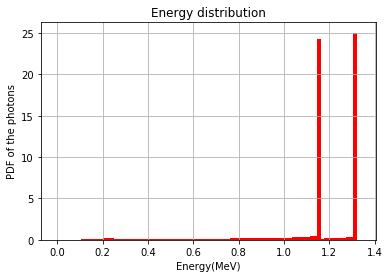

In [8]:
X = []
Y = []
W = []

scale = he.x()
n     = len(scale)
norm  = 1.0/he.integral()

sum = 0.0

for k in range (-1, he.size()+1):
    x = 0.0
    w = (he.lo() - x)
    if k == he.size():
        w = (scale[-1]-scale[-2])
        x = he.hi()
    elif k >= 0:
        w = (scale[k+1] - scale[k])
        x = scale[k]

    d = he[k]     # data from bin with index k
    y = d[0] / w  # first part of bin is collected weights
    y = y * norm
    X.append(x)
    Y.append(y)
    W.append(w)
    sum += y*w

print("PDF normalization: {0}".format(sum))

E133_10 = Y[-2]
E117_10 = Y[-2-nbins]

p1 = plt.bar(X, Y, W, color='r')

plt.xlabel('Energy(MeV)')
plt.ylabel('PDF of the photons')
plt.title('Energy distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

In [9]:
# saving peak values
print("Peak PDF value at 1.33 MeV: {0}".format(E133_10))
print("Peak PDF value at 1.17 MeV: {0}".format(E117_10))

Peak PDF value at 1.33 MeV: 25.031072007898718
Peak PDF value at 1.17 MeV: 24.306793398726985


### Filling energy histogram with quadruple number of bins

*We're building scale with 20 bins in the region between 1.17 and 1.33 MeV, all other bins below 1.17 are of about the same size as those 20.*

In [10]:
# make scale with explicit bins at 1.17 MeV and 1.33 MeV
nbins = 20

scale = BEAMphsf.make_energy_scale(nbins, lo = 0.01, me = 1.1700001, hi = 1.3300001)

he = H1Dn.H1Dn(scale)

for e in events:
    WT = e[0]
    E  = e[1]
    he.fill(E, WT)
    
print("Number of events in histogram: {0}".format(he.nof_events()))
print("Integral in histogram: {0}".format(he.integral()))
print("Underflow bin: {0}".format(he.underflow()))
print("Overflow  bin: {0}".format(he.overflow()))

Number of events in histogram: 10687272
Integral in histogram: 10687272.0
Underflow bin: (246.0, 246, 246.0)
Overflow  bin: (0.0, 0, 0.0)


*Underflow bin is empty, as well as Overflow bin. This is good because we do not expect events beyond 1.33MeV and below ECUT*

### Drawing Probability Density Function for 10 bins between 1.33 peak and 1.17 peak.

PDF normalization: 0.9999999999999998


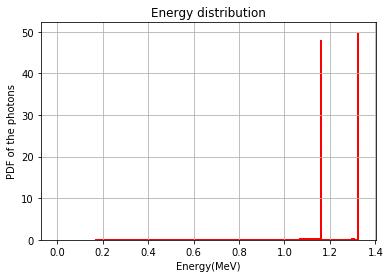

In [11]:
X = []
Y = []
W = []

scale = he.x()
n     = len(scale)
norm  = 1.0/he.integral()

sum = 0.0

for k in range (-1, he.size()+1):
    x = 0.0
    w = (he.lo() - x)
    if k == he.size():
        w = (scale[-1]-scale[-2])
        x = he.hi()
    elif k >= 0:
        w = (scale[k+1] - scale[k])
        x = scale[k]

    d = he[k]     # data from bin with index k
    y = d[0] / w  # first part of bin is collected weights
    y = y * norm
    X.append(x)
    Y.append(y)
    W.append(w)
    sum += y*w

print("PDF normalization: {0}".format(sum))

E133_20 = Y[-2]
E117_20 = Y[-2-nbins]

p1 = plt.bar(X, Y, W, color='r')

plt.xlabel('Energy(MeV)')
plt.ylabel('PDF of the photons')
plt.title('Energy distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

In [12]:
# saving peak values
print("Peak PDF value at 1.33 MeV: {0}".format(E133_20))
print("Peak PDF value at 1.17 MeV: {0}".format(E117_20))

Peak PDF value at 1.33 MeV: 49.768710855305216
Peak PDF value at 1.17 MeV: 48.1073654717499


### Comparing peak values

*We would compare peak values at 10 bins and at 5 bins. The presence of δ-peaks means that with doubling number of bins we shall expect the roughly doubling the peak values.*

In [13]:
table = ListTable.ListTable()

table.append(["Nbins", "E=1.17", "E=1.33"])
table.append(["", "MeV", "MeV"])
table.append([5, 1.0, 1.0])
table.append([10, E133_10/E133_5, E133_10/E133_5])
table.append([20, E133_20/E133_5, E133_20/E133_5])
table

Nbins,E=1.17,E=1.33
,MeV,MeV
5,1.0,1.0
10,1.9746514955479224,1.9746514955479224
20,3.926154632566635,3.926154632566635


*The result is as expected. Only few percent of the values in the 1.33 and 1.17 MeV bins are due to scattered radiation. Most values are coming from primary source and are δ-peaks in energy.*

## Spatial Distribution tests

*Here we will plot spatial distribution of the particles, projected from collimator exit position to the isocenter location at 38cm*

In [14]:
Znow  = 197.5 # we at 200mm at the cooolimator exit
Zshot = 380.0 # shot isocenter is at 380mm

# radial, X and Y, all units in mm
hr = H1Du.H1Du(120, 0.0, 40.0)
hx = H1Du.H1Du(128, -32.0, 32.0)
hy = H1Du.H1Du(128, -32.0, 32.0)

for e in events:
    WT = e[0]
    xx, yy, zz = BEAMphsf.move_event(e, Znow, Zshot)
    
    #xx = e[2]
    #yy = e[3]
    #zz = e[4]
    
    r = math.sqrt(xx*xx + yy*yy)
    hr.fill(r, WT)
    hx.fill(xx, WT)
    hy.fill(yy, WT)

print("Number of events in R histogram: {0}".format(hr.nof_events()))
print("Integral in R histogram: {0}".format(hr.integral()))
print("Underflow bin: {0}".format(hr.underflow()))
print("Overflow  bin: {0}\n".format(hr.overflow()))

print("Number of events in X histogram: {0}".format(hx.nof_events()))
print("Integral in X histogram: {0}".format(hx.integral()))
print("Underflow bin: {0}".format(hx.underflow()))
print("Overflow  bin: {0}\n".format(hx.overflow()))

print("Number of events in Y histogram: {0}".format(hy.nof_events()))
print("Integral in Y histogram: {0}".format(hy.integral()))
print("Underflow bin: {0}".format(hy.underflow()))
print("Overflow  bin: {0}".format(hy.overflow()))

Number of events in R histogram: 10687272
Integral in R histogram: 10687272.0
Underflow bin: (0.0, 0, 0.0)
Overflow  bin: (299607.0, 299607, 299607.0)

Number of events in X histogram: 10687272
Integral in X histogram: 10687272.0
Underflow bin: (116514.0, 116514, 116514.0)
Overflow  bin: (116578.0, 116578, 116578.0)

Number of events in Y histogram: 10687272
Integral in Y histogram: 10687272.0
Underflow bin: (116205.0, 116205, 116205.0)
Overflow  bin: (116900.0, 116900, 116900.0)


PDF normalization: 1.0000000000000002


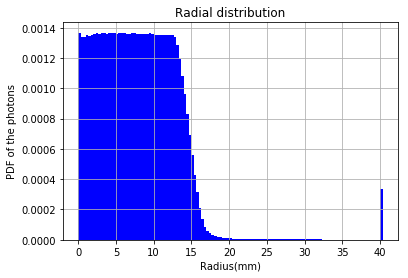

In [15]:
X = []
Y = []
W = []

norm  = 1.0/hr.integral()

sum = 0.0

st = hr.step()

for k in range (0, hr.size()+1):
    r_lo = hr.lo() + float(k) * st
    r_hi = r_lo + st
    r = 0.5*(r_lo + r_hi)
    
    ba = math.pi * (r_hi*r_hi - r_lo*r_lo) # bin area

    d = hr[k]      # data from bin with index k
    y = d[0] / ba  # first part of bin is collected weights
    y = y * norm
    X.append(r)
    Y.append(y)
    W.append(st)
    sum += y * ba

print("PDF normalization: {0}".format(sum))

p1 = plt.bar(X, Y, W, 0.0, color='b')

plt.xlabel('Radius(mm)')
plt.ylabel('PDF of the photons')
plt.title('Radial distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

NB: peak at the far right above 40mm is overflow bin

PDF normalization: 0.978189756937037


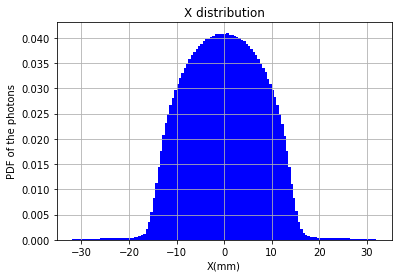

In [16]:
X = []
Y = []
W = []

norm  = 1.0/hx.integral()

sum = 0.0

st = hx.step()    

for k in range (0, hx.size()):
    x_lo = hx.lo() + float(k)*st
    x_hi = x_lo + st
    x    = 0.5*(x_lo + x_hi)

    d = hx[k]        # data from bin with index k
    y = d[0] / st    # first part of bin is collected weights
    y = y * norm
    X.append(x)
    Y.append(y)
    W.append(st)
    sum += y*st

print("PDF normalization: {0}".format(sum))

p1 = plt.bar(X, Y, W, color='b')

plt.xlabel('X(mm)')
plt.ylabel('PDF of the photons')
plt.title('X distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

PDF normalization: 0.9781885405368178


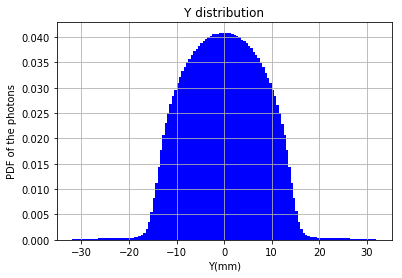

In [17]:
X = []
Y = []
W = []

norm  = 1.0/hy.integral()

sum = 0.0

st = hy.step()

for k in range (0, hy.size()):
    x_lo = hy.lo() + float(k)*st
    x_hi = x_lo + st
    x    = 0.5*(x_lo + x_hi)

    d = hy[k]       # data from bin with index k
    y = d[0] / st    # first part of bin is collected weights
    y = y * norm
    X.append(x)
    Y.append(y)
    W.append(st)
    sum += y*st

print("PDF normalization: {0}".format(sum))

p1 = plt.bar(X, Y, W, color='b')

plt.xlabel('Y(mm)')
plt.ylabel('PDF of the photons')
plt.title('Y distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

*We find spatial distribution to be consistent with the collimation setup*

## Angular Distribution tests

*Here we plot particles angular distribution for all three directional cosines, at the collimator exit. We expect angular distribution to fill collimation angle which is close to 0.033 radians (0.5x25/380).*

In [18]:
# angular, WZ, WX and WY, all units in radians
h_wz = H1Du.H1Du(100, 1.0 - 0.05, 1.0)
h_wx = H1Du.H1Du(110, -0.055, 0.055)
h_wy = H1Du.H1Du(110, -0.055, 0.055)

for e in events:
    WT = e[0]
    
    wx = e[5]
    wy = e[6]
    wz = e[7]
        
    h_wz.fill(wz, WT)
    h_wx.fill(wx, WT)
    h_wy.fill(wy, WT)

print("Number of events in WZ histogram: {0}".format(h_wz.nof_events()))
print("Integral in WZ histogram: {0}".format(h_wz.integral()))
print("Underflow bin: {0}".format(h_wz.underflow()))
print("Overflow  bin: {0}\n".format(h_wz.overflow()))

print("Number of events in WX histogram: {0}".format(h_wx.nof_events()))
print("Integral in WX histogram: {0}".format(h_wx.integral()))
print("Underflow bin: {0}".format(h_wx.underflow()))
print("Overflow  bin: {0}\n".format(h_wx.overflow()))

print("Number of events in WY histogram: {0}".format(h_wy.nof_events()))
print("Integral in WY histogram: {0}".format(h_wy.integral()))
print("Underflow bin: {0}".format(h_wy.underflow()))
print("Overflow  bin: {0}".format(h_wy.overflow()))

Number of events in WZ histogram: 10687272
Integral in WZ histogram: 10687272.0
Underflow bin: (211275.0, 211275, 211275.0)
Overflow  bin: (0.0, 0, 0.0)

Number of events in WX histogram: 10687272
Integral in WX histogram: 10687272.0
Underflow bin: (185888.0, 185888, 185888.0)
Overflow  bin: (185604.0, 185604, 185604.0)

Number of events in WY histogram: 10687272
Integral in WY histogram: 10687272.0
Underflow bin: (185698.0, 185698, 185698.0)
Overflow  bin: (186100.0, 186100, 186100.0)


PDF normalization: 0.9802311572120557


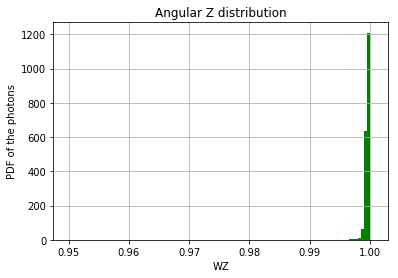

In [19]:
X = []
Y = []
W = []

norm  = 1.0/h_wz.integral()

sum = 0.0

st = h_wz.step()

for k in range (0, h_wz.size()+1):
    x_lo = h_wz.lo() + float(k)*st
    x_hi = x_lo + st
    x    = 0.5*(x_lo + x_hi)

    d = h_wz[k]       # data from bin with index k
    y = d[0] / st     # first part of bin is collected weights
    y = y * norm
    X.append(x)
    Y.append(y)
    W.append(st)
    sum += y*st

print("PDF normalization: {0}".format(sum))

p1 = plt.bar(X, Y, W, color='g')

plt.xlabel('WZ')
plt.ylabel('PDF of the photons')
plt.title('Angular Z distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

PDF normalization: 0.9652397730683753


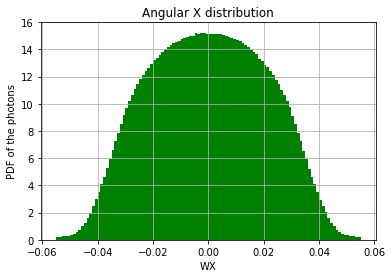

In [20]:
X = []
Y = []
W = []

norm  = 1.0/h_wx.integral()

sum = 0.0

st = h_wx.step()

for k in range (0, h_wx.size()):
    x_lo = h_wx.lo() + float(k)*st
    x_hi = x_lo + st
    x    = 0.5*(x_lo + x_hi)

    d = h_wx[k]       # data from bin with index k
    y = d[0] / st     # first part of bin is collected weights
    y = y * norm
    X.append(x)
    Y.append(y)
    W.append(st)
    sum += y*st

print("PDF normalization: {0}".format(sum))

p1 = plt.bar(X, Y, W, color='g')

plt.xlabel('WX')
plt.ylabel('PDF of the photons')
plt.title('Angular X distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

PDF normalization: 0.9652111408786076


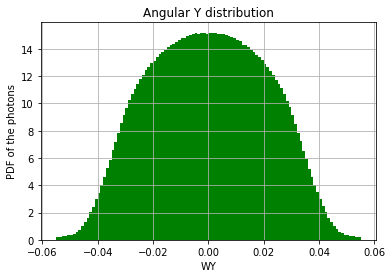

In [21]:
X = []
Y = []
W = []

norm  = 1.0/h_wy.integral()

sum = 0.0

st = h_wy.step()

for k in range (0, h_wy.size()):
    x_lo = h_wy.lo() + float(k)*st
    x_hi = x_lo + st
    x    = 0.5*(x_lo + x_hi)

    d = h_wy[k]       # data from bin with index k
    y = d[0] / st     # first part of bin is collected weights
    y = y * norm
    X.append(x)
    Y.append(y)
    W.append(st)
    sum += y*st

print("PDF normalization: {0}".format(sum))

p1 = plt.bar(X, Y, W, color='g')

plt.xlabel('WY')
plt.ylabel('PDF of the photons')
plt.title('Angular Y distribution')

plt.grid(True);
plt.tick_params(axis='x', direction='out')
plt.tick_params(axis='y', direction='out')

plt.show()

*We find photon angular distribution to be consistent with the collimation setup*

## Conclusion

*After plotting and analyzing photons energy, spatial and angular distribution, we could conclude that it is consistent with simulation Co60 source, sending particles through collimation system of 25mm collimation spot at 380mm isocenter.*